## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../dataset/flight.csv') #disesuaikan denagn path pada masing-masing
df.shape

(62988, 23)

In [4]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
13374,2327,9/17/2005,11/19/2005,Male,4,fanyu,guangdong,CN,59.0,3/31/2014,17,11695,6569.0,8095.0,29883,3/22/2014,10,38.437500,311,0,0.586918,11695,0
2520,24253,12/13/2011,12/13/2011,Male,5,guangzhou,guangdong,CN,52.0,3/31/2014,46,36406,16375.0,25482.0,77242,3/22/2014,10,15.400000,110,0,0.615024,37486,0
307,18811,4/6/2006,4/6/2006,Male,6,guangzhou,guangdong,CN,53.0,3/31/2014,137,100494,42196.0,65102.0,122439,3/30/2014,2,5.338235,27,6,0.874927,131242,12
48148,34918,4/15/2012,4/15/2012,Male,4,beijing,beijing,CN,38.0,3/31/2014,4,2876,3215.0,0.0,3164,7/21/2012,620,32.333333,90,0,0.969232,2876,0
54569,52345,1/12/2013,1/16/2013,Male,4,wuhan,hubei,CN,32.0,3/31/2014,4,1316,1209.0,995.0,3492,8/10/2013,235,68.666667,204,0,0.592500,2528,2


## Nomor 1

### Bagian A

#### Pengecekan Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Terdapat ketidaksesuaian tipe data date yang ternyata adalah tipe data object diantaranya adalah:
1. FFP_DATE
2. FIRST_FLIGHT_DATE
3. LAST_FLIGHT_DATE
4. LOAD_TIME

Terhadap tipe data yang tidak sesuai maka perlu dilakukan penyesuian yaitu dengan merubah tipe data object menjadi date

In [6]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],  errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],  errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

#### Pengecekan Data Kosong

In [7]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat banyak data yang kosong diantaranya ada pada kolom:
1. WORK_CITY     =        2269
2. WORK_PROVINCE =        3248
3. WORK_COUNTRY  =        26
4. AGE           =        420
5. SUM_YR_1      =        551
6. SUM_YR_2      =        138

Untuk data kosong ini akan di drop.

In [8]:
df = df.dropna()
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

#### Pengecekan Data Duplikat

In [9]:
df.duplicated(subset='MEMBER_NO').sum()

0

Dapat dilihat, tidak terdapat data duplikat

### Bagian B

#### Melihat Statistik Kolom

In [10]:
cats = ["GENDER", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]
nums = ["FFP_TIER", "AGE", "FLIGHT_COUNT", "BP_SUM", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "LAST_TO_END",
        "AVG_INTERVAL", "MAX_INTERVAL", "EXCHANGE_COUNT", "avg_discount", "Points_Sum", "Point_NotFlight"]
date = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE", "LOAD_TIME"]

In [11]:
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,57860,57860,57860,57860
unique,2,2935,1123,105
top,Male,guangzhou,guangdong,CN
freq,44127,9223,17215,54572


In [12]:
df[nums].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.00000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000
mean,4.104666,42.233253,12.043000,11047.843726,5363.816955,5679.279658,17324.371863,172.20598,67.963638,167.221673,0.327981,0.720626,12721.368960,2.819703
std,0.378206,9.763364,14.239523,16294.179086,8110.434363,8714.783954,20982.734648,180.80718,77.533059,122.901236,1.149762,0.183942,20621.601695,7.497873
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2599.750000,1020.000000,833.000000,4882.000000,28.00000,23.666667,81.000000,0.000000,0.612019,2863.000000,0.000000
50%,4.000000,41.000000,7.000000,5814.000000,2804.000000,2830.000000,10208.000000,105.00000,44.812500,144.000000,0.000000,0.711429,6468.000000,0.000000
75%,4.000000,48.000000,15.000000,12976.250000,6584.000000,6931.000000,21519.000000,259.25000,82.000000,228.000000,0.000000,0.808333,14491.000000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.00000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [13]:
df[date].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME
count,57860,57860,57860,57860
mean,2010-03-31 08:34:34.635326720,2010-09-24 06:33:50.833045248,2013-10-11 12:36:09.706187264,2014-03-31 00:00:00.000000256
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2012-04-01 00:00:00,2014-03-31 00:00:00
25%,2008-05-06 00:00:00,2009-01-22 00:00:00,2013-07-16 18:00:00,2014-03-31 00:00:00
50%,2010-11-17 00:00:00,2011-05-25 00:00:00,2013-12-18 00:00:00,2014-03-31 00:00:00
75%,2012-04-09 00:00:00,2012-08-04 00:00:00,2014-03-04 00:00:00,2014-03-31 00:00:00
max,2013-03-31 00:00:00,2015-04-03 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


#### Melihat Distribusi Kolom Numerik

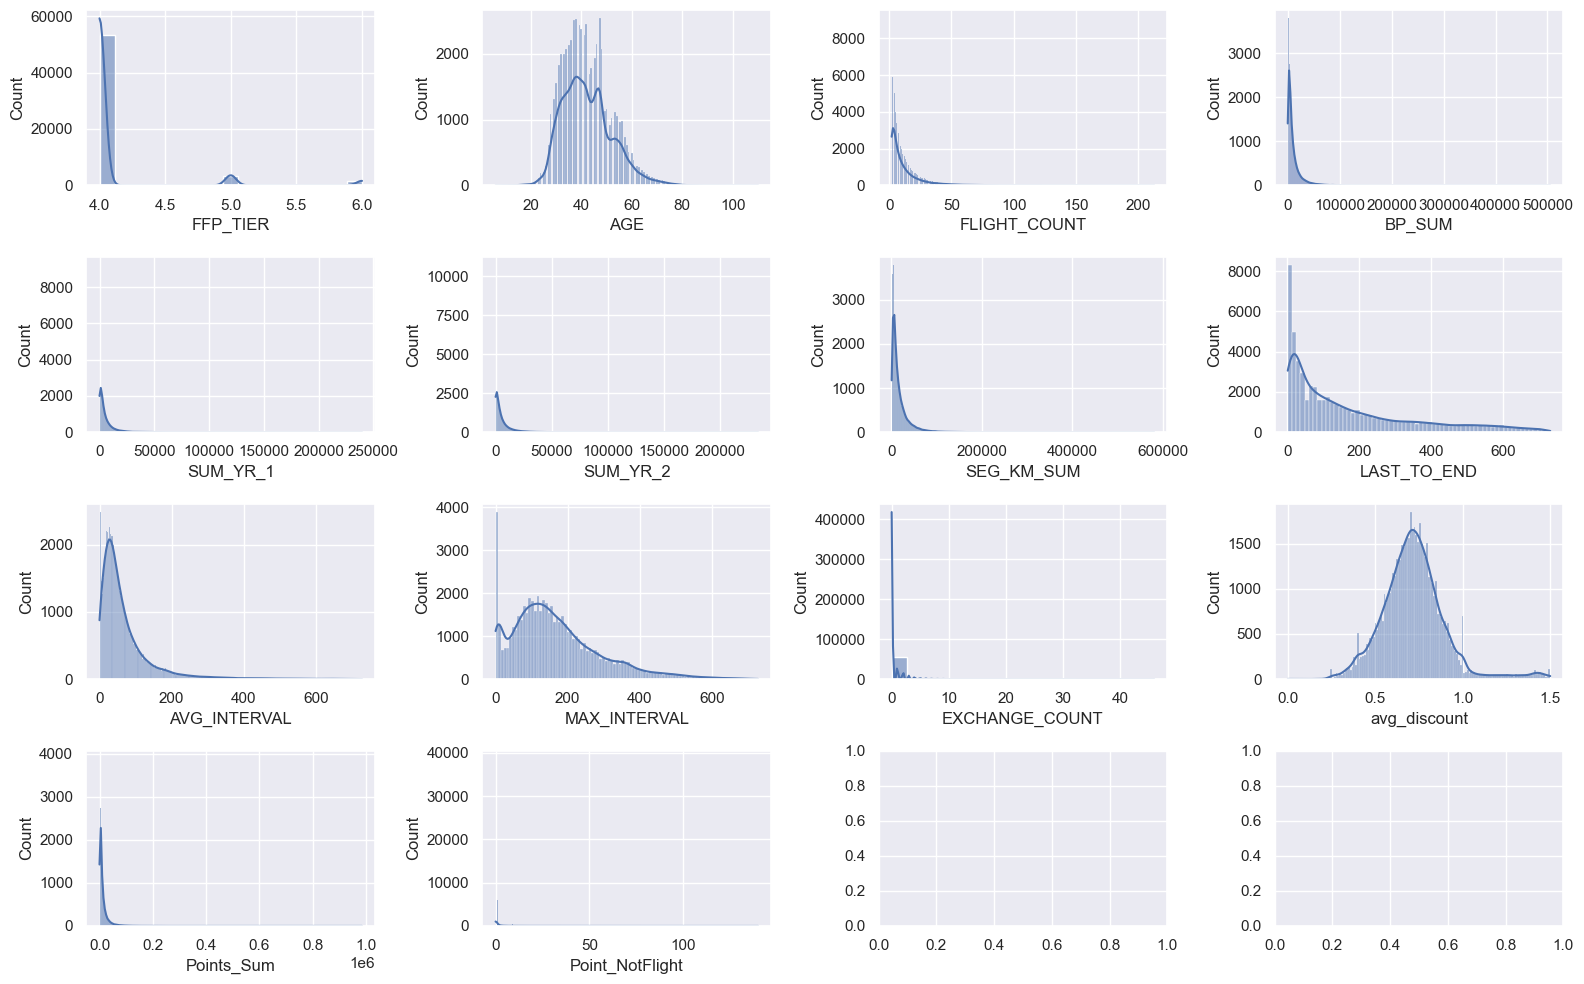

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(nums):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

#### Melihat Distribusi Kolom Kategorikal

##### Gender

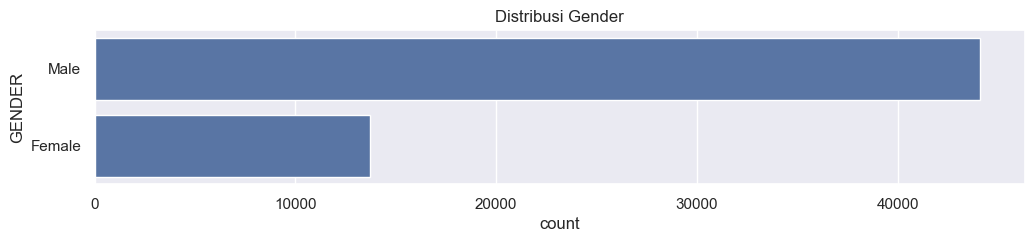

In [15]:
plt.figure(figsize=(12, 2))
sns.countplot(data=df, y='GENDER', order=df['GENDER'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

##### Kategorikal Top 20

Kolom kategorikal "WORK_CITY", "WORK_PROVINCE", dan "WORK_COUNTRY" memiliki jumlah unique value yang cukup banyak, maka dari hanya akan ditampilkan top 20 teratas saja

In [16]:
def plot_categorical(cat_column):
    top_n_values = df[cat_column].value_counts().nlargest(20).index
    
    # Membuat dataframe yang berisi hanya data dengan top 20 nilai unik
    df_filtered = df[df[cat_column].isin(top_n_values)]

    # Visualisasi data kategorikal yang telah difilter
    plt.figure(figsize=(15, 4))
    sns.countplot(data=df_filtered, x=cat_column)
    plt.title(f'Distribusi {cat_column} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

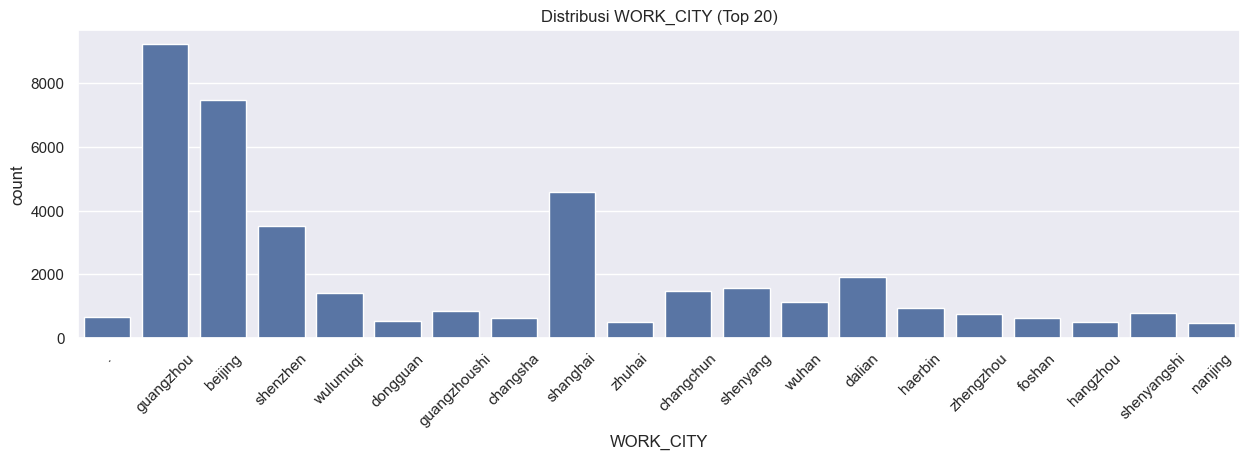

In [17]:
plot_categorical("WORK_CITY")

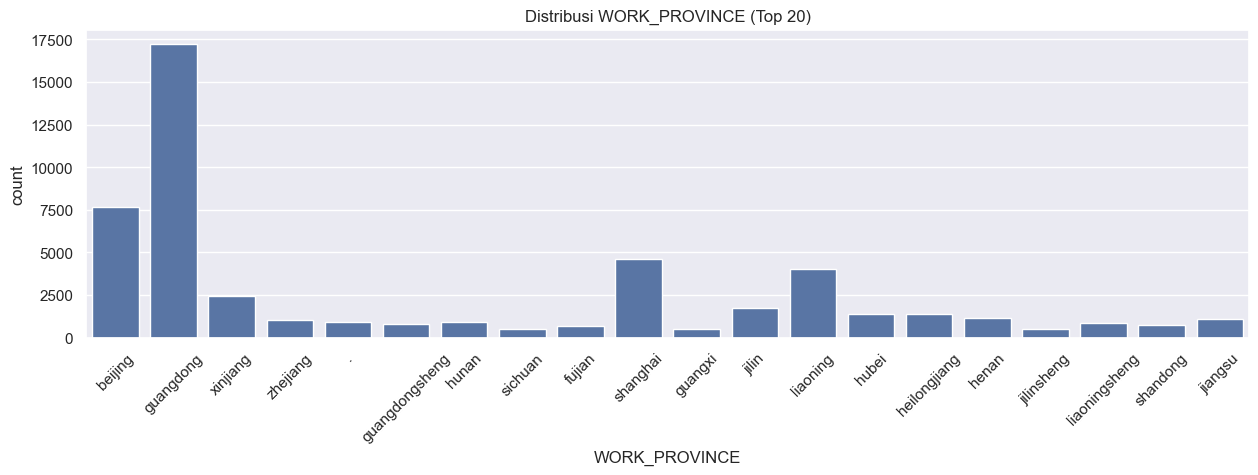

In [18]:
plot_categorical("WORK_PROVINCE")

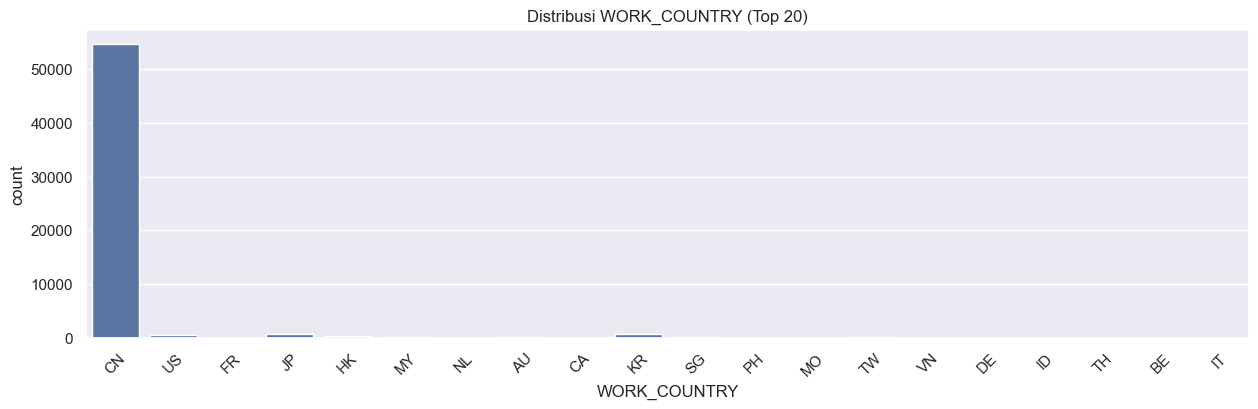

In [19]:
plot_categorical("WORK_COUNTRY")

#### Melihat Distribusi Kolom Datetime

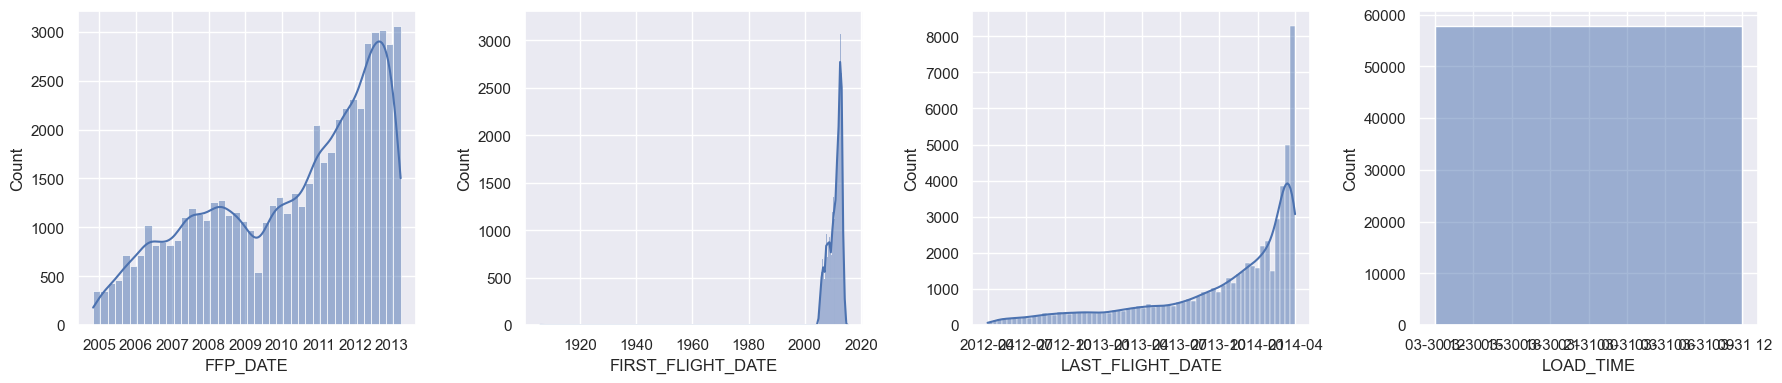

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
axs = axs.flatten()

for i, var in enumerate(date):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

Dapat terlihat dari grafik diatas bahwa terjadi kenaikan trend setiap tahunnya.

### Bagian C

#### Analisa Multivariate

<Axes: >

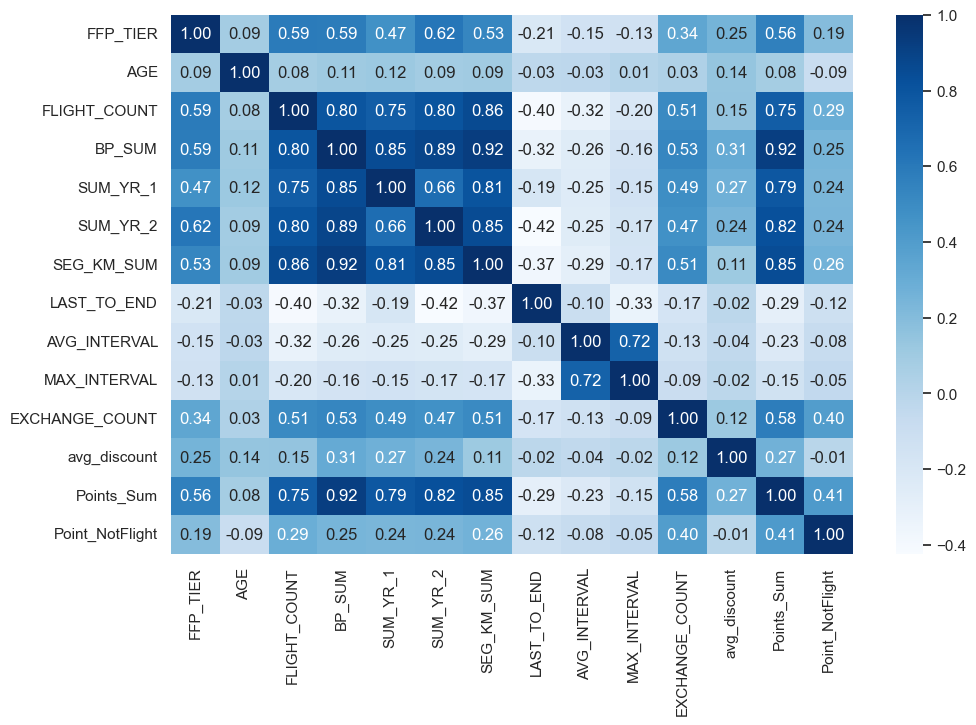

In [21]:
plt.figure(figsize=(11, 7))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi yang besar, maka untuk fitur-fitur yang memiliki nilai korelasi diatas 0.80 untuk bisa langsung dieliminasi salah satunya sehingga didapatkan 1 fitur yang tidak redundant. Untuk fitur-fitur yang memiliki nilai diatai 0.70 untuk bisa dilakukan pertimbangan apakah harus digunakan atau idak agar tidak terjadi multicol.

## Nomor 2 

### Bagian B

### Bagian A